<a href="https://colab.research.google.com/github/nickandmartinlearnstuff/practical-deep-learning-fast-ai/blob/main/planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.2MB/s 
     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 194kB 19.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
planet = untar_data(URLs.PLANET_SAMPLE)

In [4]:
planet

Path('/root/.fastai/data/planet_sample')

In [5]:
!cd /root/.fastai/data/planet_sample && ls -al

total 84
drwxrwxrwx 3 1001 1001  4096 Oct  1  2018 .
drwxr-xr-x 3 root root  4096 Dec 17 16:12 ..
-rwxrwxrwx 1 1001 1001 35835 Oct 18  2018 labels.csv
drwxrwxrwx 2 1001 1001 36864 Oct  1  2018 train


In [ ]:
!cd /root/.fastai/data/planet_sample/train && ls -al

In [9]:
!ls /root/.fastai/data/planet_sample/train | wc -l

1000


In [19]:
(planet / 'train').ls()

(#1000) [Path('/root/.fastai/data/planet_sample/train/train_33311.jpg'),Path('/root/.fastai/data/planet_sample/train/train_20834.jpg'),Path('/root/.fastai/data/planet_sample/train/train_24301.jpg'),Path('/root/.fastai/data/planet_sample/train/train_7305.jpg'),Path('/root/.fastai/data/planet_sample/train/train_32140.jpg'),Path('/root/.fastai/data/planet_sample/train/train_14593.jpg'),Path('/root/.fastai/data/planet_sample/train/train_21582.jpg'),Path('/root/.fastai/data/planet_sample/train/train_37123.jpg'),Path('/root/.fastai/data/planet_sample/train/train_33138.jpg'),Path('/root/.fastai/data/planet_sample/train/train_29091.jpg')...]

In [10]:
df = pd.read_csv(planet / 'labels.csv')

In [11]:
df.describe()

,image_name,tags
count,1000,1000
unique,1000,101
top,train_2989,clear primary
freq,1,338


In [15]:
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [22]:
def get_x(r): 
  return planet / 'train' / (r['image_name'] + '.jpg')

def get_y(r): 
  return r['tags'].split()

In [28]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.]))

**Note:** Try the dataset without the `RandomResizedCrop`, since the images are 256x256.

In [26]:
print(len(dsets.train.vocab))
dsets.train.vocab

16


['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

In [62]:
print(len(dsets.valid.vocab))
dsets.valid.vocab

17


['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

The label `clear` was added by fast.ai, and the label `blow_down` was removed.

In [27]:
len(dsets.train), len(dsets.valid)

(800, 200)

Creating the `DataLoader`
 actually loads the data 💡

In [29]:
dls = dblock.dataloaders(df)

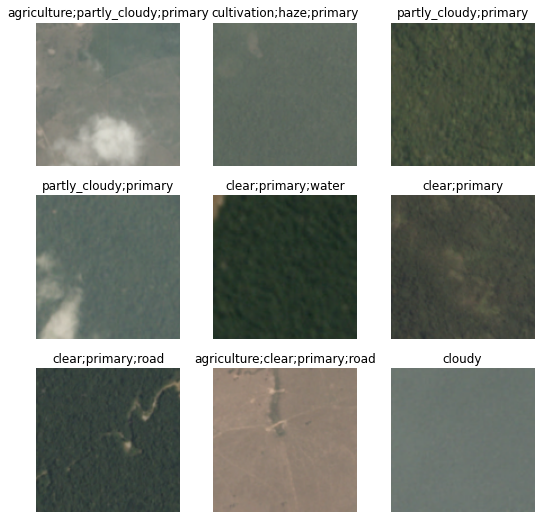

In [31]:
dls.show_batch(nrows=3)

In [32]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy_multi,time
0,1.007637,0.725245,0.262941,00:07
1,0.933715,0.691272,0.326765,00:07
2,0.864728,0.627646,0.361471,00:07
3,0.788081,0.487216,0.407647,00:07


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.528038,0.416228,0.472941,00:09
1,0.482573,0.381701,0.532353,00:09
2,0.441905,0.319809,0.522059,00:09


## Next Try

Using the 256x256

In [34]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,)
dsets = dblock.datasets(df)

In [35]:
dls = dblock.dataloaders(df)

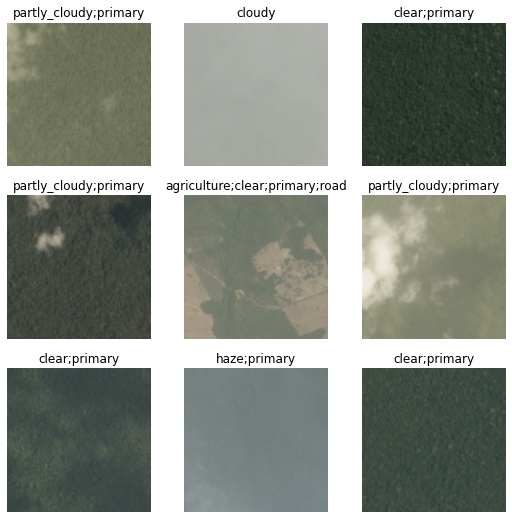

In [36]:
dls.show_batch(nrows=3)

In [37]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.965413,0.692536,0.285882,00:23
1,0.890192,0.633163,0.377059,00:23
2,0.817550,0.586122,0.377941,00:23
3,0.731948,0.460662,0.415588,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.479687,0.388443,0.468529,00:30
1,0.432168,0.333530,0.553824,00:30
2,0.395103,0.299387,0.567647,00:30


In [38]:
preds,targs = learn.get_preds()

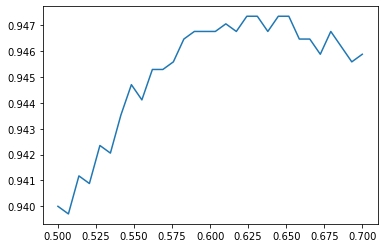

In [45]:
xs = torch.linspace(0.5,0.7,30)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [46]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.62))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.977774,0.683131,0.711177,00:23
1,0.905019,0.634226,0.781765,00:23
2,0.823290,0.575996,0.817647,00:23
3,0.735352,0.452739,0.897059,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.480992,0.381211,0.927647,00:29
1,0.436763,0.323910,0.938235,00:29
2,0.394018,0.294025,0.944412,00:29


## Back to Resizing

Another try with Resizing first

In [48]:
dblock_resize = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dsets_r = dblock_resize.datasets(df)
dsets_r.train[0]

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [56]:
dls_r = dblock_resize.dataloaders(df)
learn_r = cnn_learner(dls_r, resnet50, metrics=partial(accuracy_multi, thresh=0.62))

In [ ]:
learn_r.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

In [57]:
preds_r,targs_r = learn_r.get_preds()

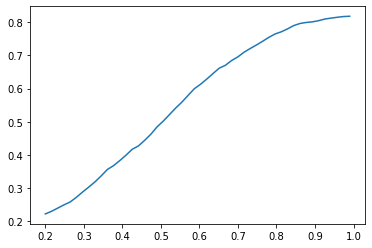

In [58]:
xs_r = torch.linspace(0.2,0.99,50)
accs_r = [accuracy_multi(preds_r, targs_r, thresh=i, sigmoid=False) for i in xs_r]
plt.plot(xs_r,accs_r);

In [ ]:
xs_r = torch.linspace(0.2,0.99,50)
accs_r = [accuracy_multi(preds_r, targs_r, thresh=i, sigmoid=False) for i in xs_r]
plt.plot(xs_r,accs_r);

# Splitting Training and Validation

- programmatically look through images and make sure that there's an 80:20 split for each label
- remove the `blow_down` images
- or try a 50:50 split

If there's really rare labels, you can run into this unless you have a defined training and validation set.

In [63]:
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


Going the route of removing the `blow_down` image below.

In [64]:
dfbd = df[df.tags.str.contains('blow_down')]

In [65]:
len(dfbd)

1

In [66]:
dfbd

,image_name,tags
105,train_38511,blow_down clear primary road


In [71]:
dfc = df[~df.tags.str.contains('blow_down')]

In [72]:
len(dfc)

999

In [73]:
planet

Path('/root/.fastai/data/planet_sample')

In [74]:
!mv /root/.fastai/data/planet_sample/train/train_38511.jpg gdrive/MyDrive/train_38511.jpg

In [75]:
dblock_resize = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dsets_r = dblock_resize.datasets(dfc)
dsets_r.train[0]

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [77]:
dls_r = dblock_resize.dataloaders(dfc)
learn_r = cnn_learner(dls_r, resnet50, metrics=partial(accuracy_multi, thresh=0.62))
learn_r.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.986359,0.733920,0.703518,00:07
1,0.917462,0.704441,0.739322,00:07
2,0.847781,0.608604,0.805276,00:07
3,0.774449,0.464470,0.885364,00:07


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.520004,0.434397,0.903266,00:09
1,0.483178,0.406016,0.916143,00:09
2,0.440745,0.326196,0.938442,00:09


## Possible Improvements

- Use the learning rate finder to find the best learning rate

In [78]:
preds_r,targs_r = learn_r.get_preds()

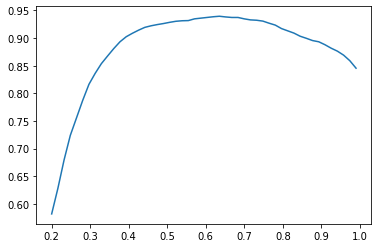

In [79]:
xs_r = torch.linspace(0.2,0.99,50)
accs_r = [accuracy_multi(preds_r, targs_r, thresh=i, sigmoid=False) for i in xs_r]
plt.plot(xs_r,accs_r);

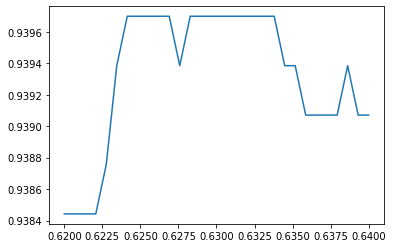

In [81]:
xs_r = torch.linspace(0.62,0.64,30)
accs_r = [accuracy_multi(preds_r, targs_r, thresh=i, sigmoid=False) for i in xs_r]
plt.plot(xs_r,accs_r);

In [82]:
!7z e gdrive/MyDrive/data/planet/test-jpg.tar.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 632362315 bytes (604 MiB)

Extracting archive: gdrive/MyDrive/data/planet/test-jpg.tar.7z
--
Path = gdrive/MyDrive/data/planet/test-jpg.tar.7z
Type = 7z
Physical Size = 632362315
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - test-jpg.tar                     1% - test-jpg.tar                     2% - test-jpg.tar                     3% - test-jpg.tar                     4% - test-jpg.tar                     5% - test-jpg.tar                     6% - test-jpg.

In [85]:
!mv test-jpg.tar gdrive/MyDrive/data/planet/test-jpg.tar

In [86]:
!tar -xf gdrive/MyDrive/data/planet/test-jpg.tar

In [87]:
!mv test-jpg gdrive/MyDrive/data/planet/test-jpg

^C


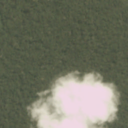

((#3) ['cultivation','partly_cloudy','primary'],
 tensor([False, False, False, False, False, False, False, False,  True, False, False,  True,  True, False, False, False, False]),
 tensor([4.3913e-02, 9.2525e-02, 8.0969e-02, 9.5631e-02, 8.5133e-02, 3.3228e-04, 2.6724e-01, 2.7310e-01, 6.2891e-01, 1.6544e-01, 1.7791e-01, 9.9710e-01, 8.2400e-01, 4.1025e-03, 3.6797e-01, 1.0486e-01,
         1.2738e-01]))

In [95]:
img = PILImage.create('/content/gdrive/MyDrive/data/planet/test-jpg/test_237.jpg')
display(img.to_thumb(128,128))
learn.predict(img)

In [96]:
data = learn.predict(img)

In [98]:
data[2][8]

tensor(0.6289)

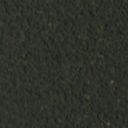

((#2) ['clear','primary'],
 tensor([False, False, False, False, False,  True, False, False, False, False, False, False,  True, False, False, False, False]),
 tensor([0.0417, 0.2354, 0.1907, 0.2366, 0.1751, 0.9918, 0.1740, 0.2355, 0.1708, 0.1554, 0.2391, 0.0470, 0.8896, 0.0832, 0.2421, 0.2552, 0.1347]))

In [99]:
img = PILImage.create('/content/gdrive/MyDrive/data/planet/test-jpg/test_999.jpg')
display(img.to_thumb(128,128))
learn.predict(img)

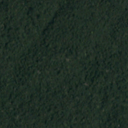

((#2) ['clear','primary'],
 tensor([False, False, False, False, False,  True, False, False, False, False, False, False,  True, False, False, False, False]),
 tensor([0.0541, 0.2110, 0.1808, 0.2012, 0.2537, 0.9919, 0.0847, 0.1586, 0.2093, 0.1146, 0.1648, 0.0399, 0.9295, 0.0530, 0.2363, 0.1446, 0.0683]))

In [105]:
img = PILImage.create('/content/gdrive/MyDrive/data/planet/test-jpg/test_42.jpg')
display(img.to_thumb(128,128))
learn.predict(img)

In [93]:
dsets.train.vocab

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

`test_7.jpg` try again and find a way to up the threshold? activation? (the thing that makes it kick in only higher than at 0.5x (because those seemed wrong)

In [89]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# creating all our widget elements
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [90]:
display(VBox([widgets.Label('Upload some rainforest! Then click "Classify"'), 
              btn_upload, btn_run, out_pl, lbl_pred]))

TypeError: ignored

In [88]:
!ls gdrive/MyDrive/data/planet/test-jpg | wc -l

37821
